In [2]:
# 📌 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 📌 Step 2: Load Data
file_path = 'D:/stock_prediction/data/TCS.csv'

if not os.path.exists(file_path):
    raise FileNotFoundError("TCS.csv not found in /data folder!")

df = pd.read_csv(file_path)
df = df[['Close']]  # Keep only 'Close' column
df.dropna(inplace=True)
df.head()


,Close
0,987.95
1,979.00
2,962.65
3,986.75
4,988.10


In [5]:
# 📌 Step 3: Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Save scaler max for inverse transform
import os
os.makedirs('../models', exist_ok=True)  # Ensure the directory exists

np.save('../models/TCS_scaler_max.npy', scaler.data_max_)


# 📌 Step 4: Create sequences
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

In [6]:
# 📌 Step 5: Split Data
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [7]:
# 📌 Step 6: Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 📌 Step 7: Train Model
es = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[es]
)


Epoch 1/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0277 - val_loss: 0.0039
Epoch 2/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 3/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 4/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 5/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 6/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 7/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 8/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 9/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 10/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 11/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 12/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# 📌 Step 8: Save Model
model.save(r'D:\stock_prediction\models\TCS_lstm_model.h5')
print("✅ Model saved to D:/stock_prediction/models/TCS_lstm_model.h5")


✅ Model saved to D:/stock_prediction/models/TCS_lstm_model.h5


In [11]:
np.save(r'D:\stock_prediction\models\TCS_scaler_max.npy', scaler.data_max_)


In [14]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# 📌 Paths
csv_path = r'D:\stock_prediction\data\TCS.csv'
model_path = r'D:\stock_prediction\models\TCS_lstm_model.h5'
scaler_max_path = r'D:\stock_prediction\models\TCS_scaler_max.npy'

# 📌 Load data
df = pd.read_csv(csv_path)
df = df[['Close']]
df.dropna(inplace=True)

# 📌 Use last 60 days for prediction
last_60_days = df[-60:].values
scaler_max = np.load(scaler_max_path)
scaled_last_60 = last_60_days / scaler_max  # Manual scaling

# 📌 Reshape to (1, 60, 1)
X_pred = np.reshape(scaled_last_60, (1, 60, 1))

# 📌 Load model
model = load_model(model_path)

# 📌 Predict
scaled_prediction = model.predict(X_pred)
predicted_price = float(scaled_prediction.flatten()[0] * scaler_max)

print(f"📈 Predicted next closing price for TCS: ₹{float(predicted_price):.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
📈 Predicted next closing price for TCS: ₹2989.46


C:\Users\Owais\AppData\Local\Temp\ipykernel_20120\1015568963.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(scaled_prediction.flatten()[0] * scaler_max)


In [15]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [16]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [17]:
DATA_DIR = r'D:/stock_prediction/data'
MODEL_DIR = r'D:/stock_prediction/models'
os.makedirs(MODEL_DIR, exist_ok=True)

EPOCHS = 30
BATCH_SIZE = 32
SEQUENCE_LENGTH = 60
invalid_files = ['stock_metadata.csv', 'NIFTY50_all.csv']


In [18]:
for file in os.listdir(DATA_DIR):
    if not file.endswith('.csv') or file in invalid_files:
        continue

    company_name = file.replace('.csv', '')
    csv_path = os.path.join(DATA_DIR, file)

    try:
        df = pd.read_csv(csv_path)
        if 'Close' not in df.columns:
            print(f"⚠️ Skipping {company_name}: 'Close' column missing.")
            continue

        df = df[['Close']].dropna()

        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(df)

        # Save scaler max
        np.save(os.path.join(MODEL_DIR, f'{company_name}_scaler_max.npy'), scaler.data_max_)

        # Create sequences
        X, y = [], []
        for i in range(SEQUENCE_LENGTH, len(scaled_data)):
            X.append(scaled_data[i - SEQUENCE_LENGTH:i, 0])
            y.append(scaled_data[i, 0])
        X, y = np.array(X), np.array(y)
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        # Train
        model = build_model((X.shape[1], 1))
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1,
                  callbacks=[early_stop], verbose=1)

        # Save model
        model_path = os.path.join(MODEL_DIR, f'{company_name}_lstm_model.h5')
        model.save(model_path)
        print(f"✅ {company_name} model saved!")

    except Exception as e:
        print(f"❌ Error training {company_name}: {e}")


Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0080 - val_loss: 0.0011
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0014 - val_loss: 7.7866e-04
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0011 - val_loss: 5.4106e-04
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0012 - val_loss: 6.8624e-04
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 8.7221e-04 - val_loss: 3.7139e-04
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 8.0820e-04 - val_loss: 4.7431e-04
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0010 - val_loss: 4.7672e-04
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 7.1505e-04 - val_loss: 5.1391e-04
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 9.1639e-04 - val_loss: 3.1522e-04
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.8256e-04 - val_loss: 3.4045e-04
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 8.0645e-04 - val_loss: 4.4083e-04
Epoch 12/3

✅ ADANIPORTS model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0159 - val_loss: 2.5764e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0021 - val_loss: 2.4502e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0017 - val_loss: 2.0380e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0012 - val_loss: 2.0306e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0013 - val_loss: 2.1816e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0016 - val_loss: 2.9026e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0012 - val_loss: 1.7157e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 8.9507e-04 - val_loss: 1.2183e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 9.6498e-04 - val_loss: 1.9010e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 9.6876e-04 - val_loss: 

✅ ASIANPAINT model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0134 - val_loss: 7.1462e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0024 - val_loss: 6.6981e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0020 - val_loss: 4.0005e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0020 - val_loss: 3.4209e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0015 - val_loss: 3.4585e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0017 - val_loss: 2.1297e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0015 - val_loss: 2.2004e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0011 - val_loss: 1.9699e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0010 - val_loss: 2.1730e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 9.9090e-04 - val_loss: 1.9409e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0016 - val_loss: 1.69

✅ AXISBANK model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0455 - val_loss: 0.0022
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 9/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 10/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 11/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 12/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0

✅ BAJAJ-AUTO model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0138 - val_loss: 0.0038
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 8.7995e-04 - val_loss: 0.0034
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 8.5831e-04 - val_loss: 0.0034
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 9.0545e-04 - val_loss: 0.0029
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 9.0226e-04 - val_loss: 0.0033
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 8.6444e-04 - val_loss: 0.0034
Epoch 9/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 7.2655e-04 - val_loss: 0.0022
Epoch 10/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 6.6912e-04 - val_loss: 0.0022
Epoch 11/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 6.1868e-04 - val_loss: 0.0021
Epoch 12/30
89/89 ━━━━━━━━━━━━━

✅ BAJAJFINSV model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0071 - val_loss: 8.4982e-04
Epoch 2/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0015 - val_loss: 5.2802e-04
Epoch 3/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 9.2566e-04 - val_loss: 3.6405e-04
Epoch 4/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 7.6134e-04 - val_loss: 4.5275e-04
Epoch 5/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 7.0923e-04 - val_loss: 9.1161e-04
Epoch 6/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 7.1908e-04 - val_loss: 3.0202e-04
Epoch 7/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 4.3641e-04 - val_loss: 3.0286e-04
Epoch 8/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 7.5952e-04 - val_loss: 2.6666e-04
Epoch 9/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 8.6413e-04 - val_loss: 2.3200e-04
Epoch 10/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0010 - val_loss: 6.4451e-04
Epoch 11/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss:

✅ BAJFINANCE model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - loss: 0.0235 - val_loss: 5.8636e-04
Epoch 2/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - loss: 0.0018 - val_loss: 6.4308e-04
Epoch 3/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - loss: 0.0017 - val_loss: 5.3202e-04
Epoch 4/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - loss: 0.0014 - val_loss: 3.8740e-04
Epoch 6/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - loss: 0.0013 - val_loss: 4.3393e-04
Epoch 7/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0011 - val_loss: 7.6686e-04
Epoch 8/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0011 - val_loss: 7.4931e-04
Epoch 9/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0013 - val_loss: 4.1252e-04
Epoch 10/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0011 - val_loss: 3.4009e-04
Epoch 11/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 9.1026e-04 - val_loss: 2.

✅ BHARTIARTL model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0151 - val_loss: 6.1329e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0025 - val_loss: 5.7322e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0020 - val_loss: 7.9729e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0018 - val_loss: 4.4393e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0015 - val_loss: 4.4084e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0014 - val_loss: 4.8620e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0013 - val_loss: 3.4077e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0013 - val_loss: 5.6096e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0012 - val_loss: 5.6401e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0012 - val_loss: 3.4347e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0013 - val_loss: 2.7315e

✅ BPCL model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - loss: 0.0123 - val_loss: 4.2548e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - loss: 0.0011 - val_loss: 5.6297e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 8.8166e-04 - val_loss: 3.0376e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 8.5881e-04 - val_loss: 2.9060e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - loss: 8.4770e-04 - val_loss: 3.0989e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - loss: 8.6002e-04 - val_loss: 5.6605e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 7.9009e-04 - val_loss: 2.5310e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 8.7248e-04 - val_loss: 3.1279e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - loss: 6.0188e-04 - val_loss: 7.5785e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 7.8333e-04 - val_loss: 2.1354e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 80

✅ BRITANNIA model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - loss: 0.0139 - val_loss: 4.8264e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - loss: 0.0023 - val_loss: 8.4946e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.0020 - val_loss: 3.4223e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - loss: 0.0017 - val_loss: 3.4323e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - loss: 0.0017 - val_loss: 3.1418e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.0017 - val_loss: 7.1622e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - loss: 0.0017 - val_loss: 2.7442e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 0.0011 - val_loss: 2.0775e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 0.0012 - val_loss: 1.9221e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 9.5491e-04 - val_loss: 3.1198e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 9.4597e-04 - 

✅ CIPLA model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0779 - val_loss: 0.0067
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0047 - val_loss: 8.6235e-04
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0040 - val_loss: 8.8959e-04
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0038 - val_loss: 4.0686e-04
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0038 - val_loss: 3.8017e-04
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0032 - val_loss: 3.7527e-04
Epoch 9/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0034 - val_loss: 3.8997e-04
Epoch 10/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0037 - val_loss: 3.3603e-04
Epoch 11/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0029 - val_loss: 4.2943e-04
Epoch 12/30
72/72 ━━━━━━━━━━━━━

✅ COALINDIA model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0095 - val_loss: 0.0023
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 9.0788e-04 - val_loss: 0.0010
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 8.8421e-04 - val_loss: 0.0020
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 8.1892e-04 - val_loss: 9.1371e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 8.5417e-04 - val_loss: 0.0014
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 6.7235e-04 - val_loss: 0.0020
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 7.4356e-04 - val_loss: 0.0015
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 6.5835e-04 - val_loss: 0.0015
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 6.0530e-04 - val_loss: 6.5160e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 5.9102e-04 - val_loss: 5.8727e-04
Epoc

✅ DRREDDY model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0143 - val_loss: 0.0047
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 9.0942e-04 - val_loss: 0.0031
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 9.5957e-04 - val_loss: 0.0033
Epoch 12/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 

✅ EICHERMOT model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0383 - val_loss: 0.0017
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 9/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0024 - val_loss: 9.8297e-04
Epoch 10/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0023 - val_loss: 8.5960e-04
Epoch 11/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 12/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 

✅ GAIL model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0260 - val_loss: 8.2165e-05
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0024 - val_loss: 1.7810e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0023 - val_loss: 5.7262e-05
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0017 - val_loss: 5.8724e-05
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0015 - val_loss: 7.9454e-05
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013 - val_loss: 2.7246e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0017 - val_loss: 2.0857e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0017 - val_loss: 6.5043e-05


✅ GRASIM model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0075 - val_loss: 5.8181e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 8.7865e-04 - val_loss: 5.8974e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 7.7568e-04 - val_loss: 6.0312e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 6.8574e-04 - val_loss: 5.6829e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 6.9643e-04 - val_loss: 8.4969e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 5.8453e-04 - val_loss: 4.7775e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.5601e-04 - val_loss: 4.1170e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.0589e-04 - val_loss: 3.2300e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.2998e-04 - val_loss: 3.1776e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 5.8575e-04 - val_loss: 2.9389e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 5.

✅ HCLTECH model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0244 - val_loss: 0.0012
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0019 - val_loss: 7.1577e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0018 - val_loss: 8.9658e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0016 - val_loss: 6.5465e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0015 - val_loss: 7.1609e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0013 - val_loss: 5.7751e-04
Epoch 12/30
148/148 ━━━━━━━━━━━━

✅ HDFC model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0191 - val_loss: 0.0025
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 12/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/ste

✅ HDFCBANK model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0284 - val_loss: 0.0011
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0017 - val_loss: 8.7274e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 7.6487e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013 - val_loss: 7.9561e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0013 - val_loss: 8.6982e-04
Epoch 12/30
148/148 ━━━━━

✅ HEROMOTOCO model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0213 - val_loss: 4.5057e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0029 - val_loss: 9.9291e-05
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0018 - val_loss: 1.5489e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0018 - val_loss: 7.2280e-05
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0016 - val_loss: 5.2856e-05
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0019 - val_loss: 5.6810e-05
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0012 - val_loss: 5.6008e-05
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0018 - val_loss: 1.2054e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0012 - val_loss: 9.7196e-05
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0011 - val_loss: 1.1410e-04


✅ HINDALCO model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0075 - val_loss: 7.2047e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 9.1258e-04 - val_loss: 5.9200e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 9.8384e-04 - val_loss: 8.1481e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 8.1121e-04 - val_loss: 0.0052
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.9269e-04 - val_loss: 5.5259e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.7611e-04 - val_loss: 4.7991e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 6.0015e-04 - val_loss: 0.0010
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 6.3569e-04 - val_loss: 4.7171e-04


✅ HINDUNILVR model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0189 - val_loss: 2.5172e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0025 - val_loss: 2.0047e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0020 - val_loss: 2.2019e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0017 - val_loss: 3.2668e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0016 - val_loss: 2.0039e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 3.2536e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0012 - val_loss: 1.9464e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0011 - val_loss: 1.6759e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0013 - val_loss: 1.4998e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 1.0687e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0011 - val_loss: 1.6987e-

✅ ICICIBANK model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0208 - val_loss: 0.0027
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.0735e-04 - val_loss: 0.0017
Epoch 9/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 8.8437e-04 - val_loss: 0.0017
Epoch 10/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.5468e-04 - val_loss: 0.0018
Epoch 11/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.8653e-04 - val_loss: 0.0034
Epoch 12/30
139/139 ━━━━━━━━━━━━━━━━

✅ INDUSINDBK model saved!
❌ Error training INFRATEL: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0034 - val_loss: 3.6437e-05
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.0205e-04 - val_loss: 1.8334e-05
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7417e-04 - val_loss: 5.2245e-06
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4455e-04 - val_loss: 4.3625e-06
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4774e-04 - val_loss: 1.6049e-05
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.2445e-04 - val_loss: 5.6046e-06
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5883e-04 - val_loss: 9.6741e-06
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7475e-04 - val_loss: 1.2204e-05
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.5841e-04 - val_loss: 3.0793e-06
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5783e-04 - val_loss: 3.5124e-05
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step

✅ INFY model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0165 - val_loss: 3.2496e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0029 - val_loss: 1.5448e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0023 - val_loss: 1.1315e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0022 - val_loss: 6.0955e-05
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0019 - val_loss: 4.6278e-05
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0019 - val_loss: 4.0712e-05
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0016 - val_loss: 5.3465e-05
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0016 - val_loss: 1.2994e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013 - val_loss: 4.7339e-05
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0014 - val_loss: 3.2997e-05
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0011 - val_loss: 3.6756e-

✅ IOC model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0072 - val_loss: 9.4301e-05
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0022 - val_loss: 5.1577e-05
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 3.6307e-05
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0013 - val_loss: 2.9849e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.7558e-04 - val_loss: 1.9587e-05
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 8.9016e-04 - val_loss: 4.1883e-05
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0010 - val_loss: 5.5525e-05
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0012 - val_loss: 1.3486e-05
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0015 - val_loss: 3.2032e-05
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.5686e-04 - val_loss: 4.7442e-05
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.7701e-04 - val_loss: 1.0

✅ ITC model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0266 - val_loss: 2.4614e-04
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0035 - val_loss: 5.4525e-04
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0025 - val_loss: 1.7023e-04
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0032 - val_loss: 1.5338e-04
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0023 - val_loss: 1.1244e-04
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0023 - val_loss: 1.0877e-04
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0019 - val_loss: 1.1930e-04
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0023 - val_loss: 1.0752e-04
Epoch 9/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0020 - val_loss: 1.0286e-04
Epoch 10/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0022 - val_loss: 1.2879e-04
Epoch 11/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0021 - val_loss: 9.4029e-05
Epoch 12

✅ JSWSTEEL model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0189 - val_loss: 0.0030
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0013 - val_loss: 0.0031
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 9.9324e-04 - val_loss: 0.0011
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 9.3357e-04 - val_loss: 0.0015
Epoch 9/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.7925e-04 - val_loss: 7.9894e-04
Epoch 10/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 8.6099e-04 - val_loss: 9.3777e-04
Epoch 11/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.0877e-04 - val_loss: 0.0014
Epoch 12/30
1

✅ KOTAKBANK model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0158 - val_loss: 2.9019e-04
Epoch 2/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0019 - val_loss: 2.4463e-04
Epoch 3/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0017 - val_loss: 1.8729e-04
Epoch 4/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0015 - val_loss: 1.8058e-04
Epoch 5/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0013 - val_loss: 1.9032e-04
Epoch 6/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0015 - val_loss: 1.7892e-04
Epoch 7/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0011 - val_loss: 1.8446e-04
Epoch 8/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0010 - val_loss: 1.4435e-04
Epoch 9/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0011 - val_loss: 1.2843e-04
Epoch 10/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 9.4140e-04 - val_loss: 1.3181e-04
Epoch 11/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 9.9830e-04 - val_loss: 1.2789e-04


✅ LT model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0236 - val_loss: 0.0021
Epoch 2/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 3/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 4/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 7/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 9.9082e-04 - val_loss: 0.0024
Epoch 8/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 9/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 9.7415e-04 - val_loss: 9.1865e-04
Epoch 10/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 8.9766e-04 - val_loss: 0.0013
Epoch 11/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 8.7583e-04 - val_loss: 0.0027
Epoch 12/30
123/123 ━

✅ MARUTI model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0445 - val_loss: 5.8211e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0030 - val_loss: 5.2392e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0028 - val_loss: 6.9956e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0028 - val_loss: 4.2472e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0026 - val_loss: 4.0562e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0021 - val_loss: 3.7470e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0021 - val_loss: 4.1028e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0021 - val_loss: 3.2527e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0017 - val_loss: 3.3270e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0021 - val_loss: 5.2902e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0017 - val_loss: 2.7737e-04
Epoch 12

✅ MM model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0130 - val_loss: 0.0041
Epoch 2/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.3042e-04 - val_loss: 0.0022
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 8.5372e-04 - val_loss: 0.0020
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.1874e-04 - val_loss: 0.0040
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.2392e-04 - val_loss: 0.0016
Epoch 8/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.6726e-04 - val_loss: 0.0018


✅ NESTLEIND model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0180 - val_loss: 0.0011
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0022 - val_loss: 9.0289e-04
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0020 - val_loss: 6.0064e-04
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0019 - val_loss: 5.0900e-04
Epoch 6/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0016 - val_loss: 3.9542e-04
Epoch 7/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0018 - val_loss: 6.6226e-04
Epoch 8/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0016 - val_loss: 4.2051e-04
Epoch 9/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0015 - val_loss: 3.4137e-04
Epoch 10/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0014 - val_loss: 3.1930e-04
Epoch 11/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0013 - val_loss: 3.0150e-04
Epoch 12/30
114/

✅ NTPC model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0273 - val_loss: 7.7707e-05
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0024 - val_loss: 1.9284e-05
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0023 - val_loss: 7.3526e-05
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0024 - val_loss: 2.9045e-05
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0022 - val_loss: 4.6939e-05
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0021 - val_loss: 4.1065e-05
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0017 - val_loss: 1.4736e-05
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0017 - val_loss: 1.8637e-05
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0018 - val_loss: 4.1741e-05
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0016 - val_loss: 1.9050e-05
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0017 - val_loss: 1.2982e-05
Epoch 12

✅ ONGC model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0400 - val_loss: 0.0022
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 8/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 11/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 12/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0016 - val_l

✅ POWERGRID model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0120 - val_loss: 8.6293e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0017 - val_loss: 6.2500e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0014 - val_loss: 5.6610e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0012 - val_loss: 4.7167e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 9.3788e-04 - val_loss: 7.9808e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 9.8067e-04 - val_loss: 5.0813e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 8.8838e-04 - val_loss: 4.2415e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 8.0157e-04 - val_loss: 9.4757e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 8.4924e-04 - val_loss: 5.4754e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.3970e-04 - val_loss:

✅ RELIANCE model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0142 - val_loss: 4.3664e-05
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0025 - val_loss: 3.5126e-05
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0020 - val_loss: 2.9659e-05
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0020 - val_loss: 1.5984e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0017 - val_loss: 5.1336e-05
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 2.0347e-05
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013 - val_loss: 2.8313e-05
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0012 - val_loss: 1.8547e-05
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0012 - val_loss: 1.7321e-05
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0010 - val_loss: 1.6305e-05
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 6.7938e-05
Epoch 12

✅ SBIN model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0141 - val_loss: 0.0014
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.8214e-04 - val_loss: 0.0029
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.0213e-04 - val_loss: 0.0016
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.3852e-04 - val_loss: 0.0012
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.1894e-04 - val_loss: 0.0013
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4861e-04 - val_loss: 0.0022
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9948e-04 - val_loss: 0.0016
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.5919e-04 - val_loss: 0.0022
Epoch 9/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.2720e-04 - val_loss: 9.7920e-04
Epoch 10/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1477e-04 - val_loss: 9.1517e-04
Epoch 11/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7775e-04 - val_loss: 0.0012
Epoc

✅ SHREECEM model saved!


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0071 - val_loss: 8.1741e-05
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0015 - val_loss: 5.4164e-05
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.5822e-04 - val_loss: 3.4993e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.9281e-04 - val_loss: 5.8404e-05
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.1322e-04 - val_loss: 1.6668e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.2178e-04 - val_loss: 4.9674e-05
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.3812e-04 - val_loss: 3.6978e-05
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4276e-04 - val_loss: 3.3399e-05
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.9030e-04 - val_loss: 1.0637e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.7030e-04 - val_loss: 5.3594e-05
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - l

✅ SUNPHARMA model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0166 - val_loss: 2.2876e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0020 - val_loss: 1.6288e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0017 - val_loss: 2.7110e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0015 - val_loss: 1.1317e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0015 - val_loss: 1.1157e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0013 - val_loss: 1.0919e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0011 - val_loss: 2.0365e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0011 - val_loss: 1.2692e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0011 - val_loss: 1.0919e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.7179e-04 - val_loss: 7.5633e-05
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 9.1246e-04 - val_loss: 1.5527e-04


✅ TATAMOTORS model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0261 - val_loss: 0.0019
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0018 - val_loss: 9.2562e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0017 - val_loss: 8.6943e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0015 - val_loss: 8.6907e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0015 - val_loss: 7.8648e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013 - val_loss: 8.7996e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0012 - val_loss: 7.6104e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0012 - val_loss: 6.2820e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0013 - val_loss: 5.7351e-04
Epoch 12/30
148/148 

✅ TATASTEEL model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0185 - val_loss: 0.0018
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0024 - val_loss: 8.9019e-04
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0016 - val_loss: 8.1277e-04
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0017 - val_loss: 7.9077e-04
Epoch 9/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0019 - val_loss: 4.9423e-04
Epoch 10/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 7.9898e-04
Epoch 11/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0015 - val_loss: 4.7168e-04
Epoch 12/30
115/115 ━━━━━━━━

✅ TCS model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0151 - val_loss: 6.4876e-04
Epoch 2/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0033 - val_loss: 2.2081e-04
Epoch 3/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0028 - val_loss: 1.5819e-04
Epoch 4/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017 - val_loss: 1.5933e-04
Epoch 5/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0019 - val_loss: 1.3354e-04
Epoch 6/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0023 - val_loss: 1.2761e-04
Epoch 7/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0016 - val_loss: 4.8490e-04
Epoch 8/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0014 - val_loss: 1.1241e-04
Epoch 9/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0011 - val_loss: 1.7538e-04
Epoch 10/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0010 - val_loss: 1.3657e-04
Epoch 11/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 9.8804e-04 - val_loss: 1.6837e-04
Epoc

✅ TECHM model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0055 - val_loss: 1.6922e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 9.4894e-04 - val_loss: 0.0017
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0017 - val_loss: 1.1062e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0010 - val_loss: 1.0517e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 9.8675e-04 - val_loss: 8.8777e-05
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 9.4279e-04 - val_loss: 3.2955e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 8.2550e-04 - val_loss: 8.0911e-05
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 6.4141e-04 - val_loss: 6.4834e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0016 - val_loss: 6.4617e-05
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0015 - val_loss: 1.8317e

✅ TITAN model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0198 - val_loss: 0.0014
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 8.3975e-04 - val_loss: 0.0025
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.8474e-04 - val_loss: 0.0013
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.3630e-04 - val_loss: 0.0030
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.0160e-04 - val_loss: 0.0012
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.0486e-04 - val_loss: 0.0012
Epoch 9/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 6.4765e-04 - val_loss: 9.1292e-04
Epoch 10/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 6.2237e-04 - val_loss: 0.0021
Epoch 11/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 6.1254e-04 - val_loss: 0.0012
Epoch 12/30
115/

✅ ULTRACEMCO model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0359 - val_loss: 0.0016
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0022 - val_loss: 9.5742e-04
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0020 - val_loss: 9.3781e-04
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0024 - val_loss: 8.9703e-04
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0018 - val_loss: 8.7055e-04
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0018 - val_loss: 7.2664e-04
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0019 - val_loss: 9.3620e-04
Epoch 9/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0015 - val_loss: 6.5049e-04
Epoch 10/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0018 - val_loss: 6.1720e-04
Epoch 11/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0023 - val_loss: 6.3409e-04
Epoch 12/30
119/

✅ UPL model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0056 - val_loss: 1.3912e-05
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 8.2436e-05
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - val_loss: 2.1004e-05
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0012 - val_loss: 3.6431e-06
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.7387e-04 - val_loss: 5.7210e-06
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.6110e-04 - val_loss: 9.3369e-06
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 8.0541e-04 - val_loss: 8.8205e-05
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.4092e-04 - val_loss: 9.0191e-05
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 7.3640e-04 - val_loss: 1.7981e-04


✅ VEDL model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0017 - val_loss: 1.7572e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9209e-04 - val_loss: 2.0792e-06
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.6835e-04 - val_loss: 4.6164e-06
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.5647e-04 - val_loss: 1.2528e-05
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.2993e-04 - val_loss: 7.6919e-05
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4366e-04 - val_loss: 8.9104e-06
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.1001e-04 - val_loss: 2.2271e-05


✅ WIPRO model saved!
Epoch 1/30


d:\stock_prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0026 - val_loss: 2.3074e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9575e-04 - val_loss: 2.5581e-04
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1830e-04 - val_loss: 1.6491e-04
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2500e-04 - val_loss: 1.7737e-04
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9890e-04 - val_loss: 1.4189e-04
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.7130e-04 - val_loss: 1.4280e-04
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.7338e-04 - val_loss: 1.8167e-04
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.2432e-04 - val_loss: 1.2311e-04
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3867e-04 - val_loss: 1.3243e-04
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 2.0318e-04 - val_loss: 1.4076e-04
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.

✅ ZEEL model saved!


C:\Users\Owais\AppData\Local\Temp\ipykernel_20120\2496631880.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaler_max = float(np.load(SCALER_MAX_PATH))


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


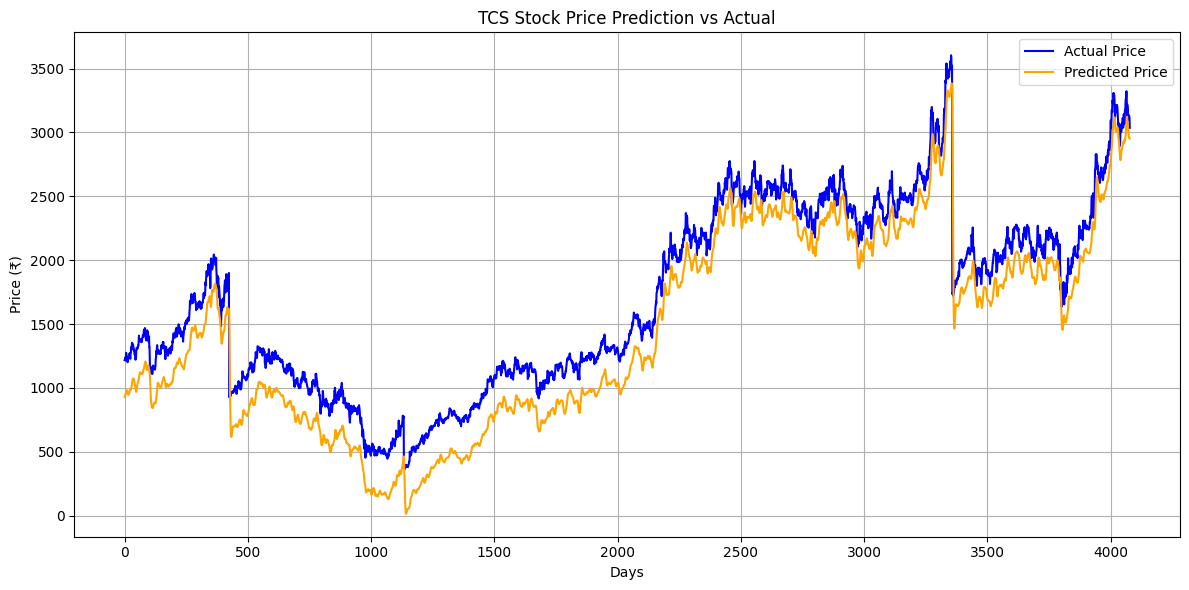

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import os

# Paths
CSV_PATH = r"D:/stock_prediction/data/TCS.csv"
MODEL_PATH = r"D:/stock_prediction/notebooks/models/TCS_lstm_model.h5"
SCALER_MAX_PATH = r"D:/stock_prediction/notebooks/models/TCS_scaler_max.npy"
SEQUENCE_LENGTH = 60

# Step 1: Load the data
df = pd.read_csv(CSV_PATH)[['Close']].dropna()

# Step 2: Prepare the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Load model and max scaler
model = load_model(MODEL_PATH)
scaler_max = float(np.load(SCALER_MAX_PATH))

# Step 4: Create sequences and predictions
X = []
for i in range(SEQUENCE_LENGTH, len(scaled_data)):
    X.append(scaled_data[i - SEQUENCE_LENGTH:i])

X = np.array(X)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

predictions_scaled = model.predict(X)
predictions = predictions_scaled.flatten() * scaler_max

# Actual prices to compare
actual = df['Close'].values[SEQUENCE_LENGTH:]

# Step 5: Plot the comparison graph
plt.figure(figsize=(12, 6))
plt.plot(actual, label="Actual Price", color='blue')
plt.plot(predictions, label="Predicted Price", color='orange')
plt.title("TCS Stock Price Prediction vs Actual")
plt.xlabel("Days")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
